<a href="https://colab.research.google.com/drive/1cuJsP-X7pOdvQGRxOBESp9N9HSiSUemQ?usp=sharing">
  <img align="center" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install transformers
!pip install sentencepiece
#!pip install tensorflow==2.4.0 

     |████████████████████████████████| 2.5MB 20.7MB/s 
     |████████████████████████████████| 3.3MB 43.0MB/s 
     |████████████████████████████████| 901kB 45.5MB/s 
     |████████████████████████████████| 1.2MB 18.9MB/s 


In [2]:
!pip install tensorflow_addons

     |████████████████████████████████| 686kB 30.6MB/s 


In [3]:
!gdown --id 1Y4xBp6ZUN0PFjGtAmMi_QWJccPV1AHH1

Downloading...
From: https://drive.google.com/uc?id=1Y4xBp6ZUN0PFjGtAmMi_QWJccPV1AHH1
To: /content/datasetHoax.csv
2.42MB [00:00, 37.8MB/s]


In [4]:
# import module
import pandas as pd
import numpy as np
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from transformers import AutoTokenizer, TFAutoModel

from sklearn.model_selection import train_test_split
AUTO = tf.data.experimental.AUTOTUNE
df = pd.read_csv("datasetHoax.csv")

IMPORTING ALL DATASETS

In [35]:
!gdown --id 1OjS92lR6qMUnZysccXKg3v5Q1yOsK3Y- #data Hatespeech Tambahan
!gdown --id 1mhMYVU339JsTlS0JZt9p4VdhJ8Ijms78 #data HateSpeech Old
!gdown --id 1Y4xBp6ZUN0PFjGtAmMi_QWJccPV1AHH1 #data Hoax
!gdown --id 1RndPNl3PBbIuZkLs8N1NybcT72PqY6uB #data Normal
!gdown --id 1uhhzN2yFKyYqDy4Yi2pDSjvOw_0w_ELs #Data offensive


Downloading...
From: https://drive.google.com/uc?id=1OjS92lR6qMUnZysccXKg3v5Q1yOsK3Y-
To: /content/DataHateSpeech Telah Ditambah.csv
100% 264k/264k [00:00<00:00, 17.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mhMYVU339JsTlS0JZt9p4VdhJ8Ijms78
To: /content/DataHateSpeech.csv
100% 132k/132k [00:00<00:00, 3.97MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y4xBp6ZUN0PFjGtAmMi_QWJccPV1AHH1
To: /content/datasetHoax.csv
2.42MB [00:00, 38.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RndPNl3PBbIuZkLs8N1NybcT72PqY6uB
To: /content/normal.csv
100% 897k/897k [00:00<00:00, 28.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uhhzN2yFKyYqDy4Yi2pDSjvOw_0w_ELs
To: /content/Offensive.csv
100% 164k/164k [00:00<00:00, 5.13MB/s]


## Yow Read the Dataset

In [42]:
dfHateSpeechtambahan = pd.read_csv("DataHateSpeech Telah Ditambah.csv")
dfHateSpeech = pd.read_csv("DataHateSpeech.csv")
dfHoax = pd.read_csv("datasetHoax.csv")
dfOffensive = pd.read_csv("Offensive.csv")
dfNormal = pd.read_csv("normal.csv")

print(dfHateSpeechtambahan.shape)
print(dfHateSpeech.shape)
print(dfHoax.shape)
print(dfOffensive.shape)
print(dfNormal.shape)

(2983, 1)
(1111, 2)
(9663, 3)
(1791, 1)
(9055, 1)


Pengubahan label

## Normal : 0
## Hoax : 1
## Hate : 2
## Offensive : 3

In [54]:
dfHateSpeechtambahan["labels"] = 2

In [43]:
dfHateSpeech["labels"] = 2

In [45]:
dfOffensive["labels"] = 3

In [47]:
dfNormal["labels"]= 0

In [49]:
dfHoaxNormal = dfHoax.loc[dfHoax["label"] == 0,:]
dfHoax = dfHoax.loc[dfHoax["label"] == 1, :]

print(dfHoaxNormal.shape)
print(dfHoax.shape)

(1471, 4)
(8192, 4)


In [ ]:
dfHoaxNormal = dfHoaxNormal.iloc[:,:-1]
dfHoax = dfHoax.iloc[:,:-1]
print(dfHoaxNormal.shape)
print(dfHoax.shape)

In [59]:
dfHoax = dfHoax.loc[:,["narasi","label"]]
dfHoaxNormal = dfHoaxNormal.iloc[: , 1:]
dfHoaxNormal.head(1)

narasi  label
19  Astaga! Sandiaga Sarankan Warga Ngadu ke Kelur...      0

In [60]:
dfHateSpeechtambahan.columns = ["tweet","labels"]
dfOffensive.columns =["tweet","labels"]
dfNormal.columns = ["tweet","labels"]
dfHateSpeech.columns = ["tweet","labels"]
dfHoax.columns =["tweet","labels"]
dfHoaxNormal.columns = ["tweet","labels"]

In [65]:
dfAllData = pd.DataFrame(columns= ["tweet","labels"])
dfAllData = pd.concat([dfAllData,dfOffensive,dfHateSpeech,dfHoax,dfHoaxNormal,dfNormal])
dfAllData

tweet labels
0                                        bego nusantara      3
1     lebih sadis postingan victor bodoh jasmev dan ...      3
2                             aku mau ngentot sama kamu      3
3     manusia kampret bernama syahroni daud ini akhi...      3
4     masuk katagori barisan dajal dan iblis sih bu ...      3
...                                                 ...    ...
9050  username sudah mengikuti mereka dari mereka de...      0
9051  iya juga satu gerbong sama semuanya mulut mere...      0
9052  selesai infus di rumah sakit langsung konferen...      0
9053  kalau kamu ajak saya pun memang saya tidak mau...      0
9054  lebih baik disuruh makan tali kopling apa dapa...      0

[21620 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   9662 non-null   object
 1   narasi  9660 non-null   object
 2   label   9663 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 226.6+ KB


In [7]:
sample = df.sample(1)["narasi"].values[0]
print(sample)

Peringatan buat kita semua !!!!!
 Org tua keluar mobil mengisi BENSIN
 Anak anak maen hp didalam mobil
 Menyebabkan sebuah PELEDAKAN !!!
 Pom bensin Cipinang meledak dan terbakar.


In [8]:
def removeSameData(df):
  indx = []
  for key,judul in df["judul"].items():
    for key2,narasi in df["narasi"].items():
      if judul == narasi :
        indx.append(key)
  return indx
indexSameAsNarasi = (removeSameData(df))

In [9]:
df["judulSameAsNarasi"] = 0
df.iloc[indexSameAsNarasi,3] = 1

In [10]:
def cleanIt(text):
  
  text = str(text)
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[#]+|[^A-Za-z0-9]+"
  text_cleaning_hash = "#[A-Za-z0-9]+" 

  text = re.sub(text_cleaning_hash, " ",text).rstrip()
  text = re.sub(text_cleaning_re, " ",text).rstrip()
  
  return text
cleanIt(sample)

'Peringatan buat kita semua Org tua keluar mobil mengisi BENSIN Anak anak maen hp didalam mobil Menyebabkan sebuah PELEDAKAN Pom bensin Cipinang meledak dan terbakar'

In [11]:
df["judul"] = df["judul"].apply(cleanIt)
df["narasi"] = df["narasi"].apply(cleanIt)


## TransferLearning Section menggunakan transformer model

In [12]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2",output_attentions=True)
IndoBert = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2",)


Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [13]:
# Check panjang text Narasi
from collections import Counter
seq_len = [len(text.split()) for text in df["narasi"] if type(text) != float]
print(Counter(seq_len))

Counter({8: 566, 9: 565, 7: 555, 10: 485, 11: 463, 6: 454, 12: 380, 13: 353, 5: 345, 14: 276, 15: 262, 4: 240, 16: 218, 17: 188, 18: 187, 20: 165, 19: 149, 3: 144, 22: 139, 27: 136, 24: 129, 21: 116, 23: 115, 28: 111, 26: 111, 32: 104, 30: 104, 25: 103, 36: 94, 29: 92, 34: 92, 31: 88, 37: 82, 38: 81, 33: 80, 35: 73, 41: 67, 40: 65, 42: 64, 44: 62, 39: 62, 43: 60, 46: 58, 45: 56, 2: 53, 51: 47, 49: 41, 50: 41, 47: 40, 48: 40, 52: 35, 58: 34, 54: 34, 55: 32, 56: 29, 53: 28, 65: 24, 57: 23, 59: 23, 62: 21, 60: 20, 64: 19, 63: 19, 83: 18, 61: 18, 70: 17, 75: 17, 69: 15, 66: 15, 77: 15, 72: 14, 67: 14, 71: 14, 78: 14, 80: 13, 68: 12, 76: 12, 86: 12, 82: 11, 1: 11, 74: 11, 87: 11, 81: 10, 79: 10, 85: 9, 84: 9, 111: 9, 91: 8, 129: 8, 73: 8, 113: 8, 93: 7, 98: 7, 95: 7, 106: 6, 92: 6, 88: 5, 135: 5, 115: 5, 139: 5, 110: 5, 108: 5, 268: 5, 156: 5, 101: 4, 118: 4, 109: 4, 107: 4, 100: 4, 116: 4, 132: 4, 104: 4, 259: 4, 252: 4, 157: 4, 123: 4, 119: 4, 122: 4, 102: 4, 173: 4, 120: 3, 127: 3, 199: 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


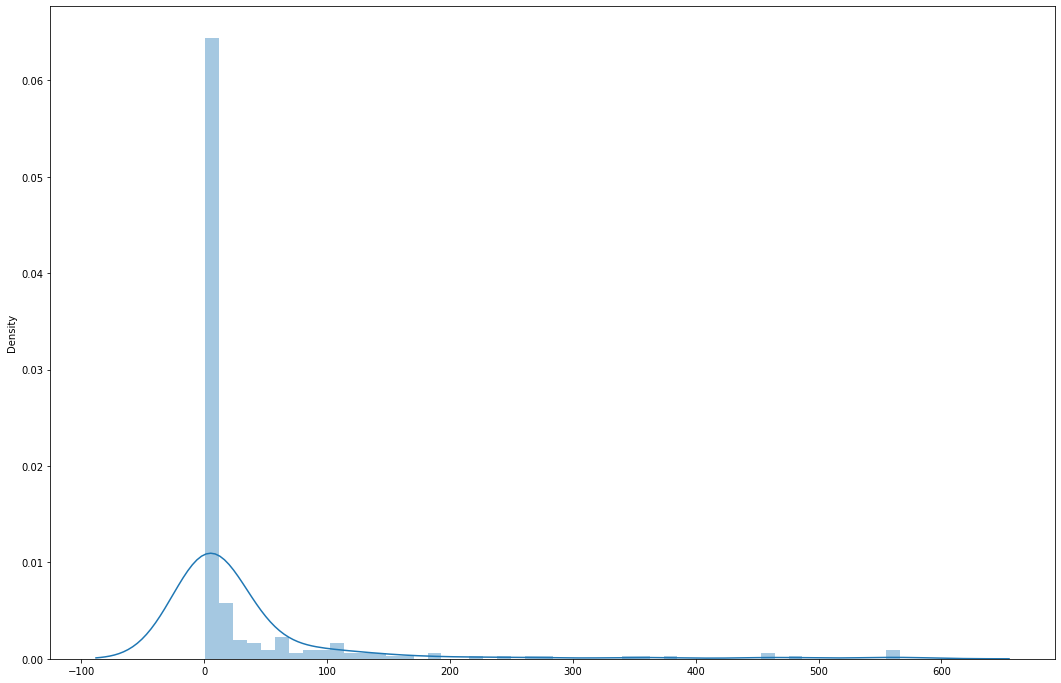

In [14]:
plt.figure(figsize=(18,12))
sns.distplot(list(dict(Counter(seq_len)).values()))

In [15]:
x_train,x_val = train_test_split(df , test_size=0.2, random_state = 10)

In [16]:
token_train = {
    "narasi" : tokenizer.batch_encode_plus(
        x_train["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
token_train

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'narasi': {'input_ids': [[2, 3031, 17802, 4139, 30354, 14504, 13974, 4068, 1871, 26, 4049, 2024, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 259, 422, 2768, 14233, 16661, 9827, 22392, 14233, 16661, 26, 2012, 1110, 2418, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 3650, 219, 843, 493, 2896, 377, 5107, 1470, 1794, 26, 11208, 2061, 43, 795, 2572, 11182, 7883, 11482, 1697, 30368, 4545, 12001, 618, 1783, 10087, 6861, 58, 79, 3980, 5397, 1290, 28, 1470, 1794, 4545, 13760, 19621, 2179, 32, 10087, 6861, 58, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
token_val = {
    "narasi" : tokenizer.batch_encode_plus(
        x_val["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
token_val

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'narasi': {'input_ids': [[2, 9302, 173, 6100, 1387, 5803, 256, 18422, 4330, 7280, 286, 830, 20327, 1268, 112, 1644, 683, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 906, 90, 6389, 8918, 24536, 5961, 7256, 11756, 6106, 20768, 6389, 8918, 1703, 1107, 741, 119, 2468, 4446, 12050, 4840, 30370, 8918, 1152, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 92, 1769, 13945, 26900, 4789, 21472, 8720, 1614, 30362, 2904, 1769, 13945, 741, 5002, 4789, 21472, 19946, 32, 3308, 1383, 30358, 19219, 30365, 10941, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [18]:
train_data = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train["narasi"]["input_ids"])),
}

validation_data = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val["narasi"]["input_ids"])),
}

train_dataWithAttention = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train["narasi"]["input_ids"])),
    "narasiMask" : tf.squeeze(tf.convert_to_tensor(token_train["narasi"]["attention_mask"]))
}

validation_dataWithAttention = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val["narasi"]["input_ids"])),
    "narasiMask" : tf.squeeze(tf.convert_to_tensor(token_val["narasi"]["attention_mask"]))
}

In [19]:
y_train = tf.convert_to_tensor(x_train["label"])
y_val = tf.convert_to_tensor(x_val["label"])

In [20]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,2)
y_val = to_categorical(y_val,2)

In [21]:
datasetTraining = (tf.data.Dataset.from_tensor_slices((train_data,y_train)).batch(64).prefetch(AUTO))
datasetValidation = (tf.data.Dataset.from_tensor_slices((validation_data,y_val)).batch(64).prefetch(AUTO).cache())

datasetTrainingWithAttention = (tf.data.Dataset.from_tensor_slices((train_data,y_train)).batch(64).prefetch(AUTO))
datasetValidationWithAttention =(tf.data.Dataset.from_tensor_slices((validation_data,y_val)).batch(64).prefetch(AUTO).cache())

In [22]:
METRICS = [
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'), 
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
  ]
def architecture(passedModel):
  METRICS = [
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'), 
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
  ]

  ids1 = tf.keras.layers.Input(shape=(99,),dtype=tf.int32,name="narasi")

  last_hidden_state, pooler_output = passedModel(ids1).to_tuple()
  layers = tf.keras.layers.Flatten()(last_hidden_state)
  layers = tf.keras.layers.Dense(units=500,activation=tf.nn.relu)(layers)
  layers = tf.keras.layers.Dropout(0.3)(layers)
  layers = tf.keras.layers.Dense(units=1024,activation=tf.nn.relu)(layers)
  layers = tf.keras.layers.Dense(128,activation=tf.nn.relu)(layers)
  fin_layer = tf.keras.layers.Dense(4,activation= tf.nn.softmax)(layers)

  final = tf.keras.Model(inputs=[ids1],outputs=[fin_layer])
  
  for layer in final.layers:
    layer.trainable = False
  for layer in final.layers[-5:]:
    layer.trainable = True 
  optimizer = tf.keras.optimizers.Adam(learning_rate=.001,clipnorm=0.001)
  final.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(), optimizer=optimizer,metrics = METRICS)

  return final

In [23]:
def indoBertModel():
  return architecture(IndoBert)

In [24]:
def indoBertModelAttention():
  ids1 = tf.keras.layers.Input(shape=(99,),dtype=tf.int32,name="narasi")
  attention = tf.keras.layers.Input(shape=(99,),dtype=tf.int32,name="narasiMask")

  last_hidden_state, pooler_output = IndoBert(ids1,attention_mask=attention).to_tuple()
  layers = tf.keras.layers.Flatten()(last_hidden_state)
  layers = tf.keras.layers.Dense(units=500,activation=tf.nn.relu)(layers)
  layers = tf.keras.layers.Dropout(0.3)(layers)
  layers = tf.keras.layers.Dense(units=1024,activation=tf.nn.relu)(layers)
  layers = tf.keras.layers.Dense(128,activation=tf.nn.relu)(layers)
  fin_layer = tf.keras.layers.Dense(2,activation= tf.nn.softmax)(layers)

  final = tf.keras.Model(inputs=[ids1,attention],outputs=[fin_layer])
  
  for layer in final.layers:
    layer.trainable = False
  for layer in final.layers[-5:]:
    layer.trainable = True 
  optimizer = tf.keras.optimizers.Adam(learning_rate=.001,clipnorm=0.001)
  final.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(), optimizer=optimizer,metrics = METRICS)

  return final
indoBertModelAttentionObj = indoBertModelAttention()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

## Another Models ROBERTA SECTION

In [25]:
RobertaModelName = "cahya/roberta-base-indonesian-522M"
RobertaModel = TFAutoModel.from_pretrained(RobertaModelName)
RobertaTokenizer = AutoTokenizer.from_pretrained(RobertaModelName)
token_train_Roberta = {
    "narasi" : RobertaTokenizer.batch_encode_plus(
        x_train["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}

token_val_Roberta = {
    "narasi" : RobertaTokenizer.batch_encode_plus(
        x_val["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
train_dataRoberta = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train_Roberta["narasi"]["input_ids"]))
}
validation_dataRoberta = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val_Roberta["narasi"]["input_ids"]))
}
train_dataRoberta = (tf.data.Dataset.from_tensor_slices((train_dataRoberta,y_train))).batch(64).prefetch(AUTO)
validation_dataRoberta = (tf.data.Dataset.from_tensor_slices((validation_dataRoberta,y_val))).batch(64).prefetch(AUTO).cache()

def robertaModel():
  model = architecture(RobertaModel)
  return model

Some layers from the model checkpoint at cahya/roberta-base-indonesian-522M were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cahya/roberta-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## ANOTHER MODEL , BERT

In [26]:
BertModelName = "cahya/bert-base-indonesian-522M"
BertModel = TFAutoModel.from_pretrained(RobertaModelName)
BertModelTokenizer = AutoTokenizer.from_pretrained(RobertaModelName)
token_train_bert = {
    "narasi" : BertModelTokenizer.batch_encode_plus(
        x_train["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}

token_val_bert = {
    "narasi" : BertModelTokenizer.batch_encode_plus(
        x_val["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
train_databert = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train_Roberta["narasi"]["input_ids"]))
}
validation_databert = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val_Roberta["narasi"]["input_ids"]))
}
train_databert = (tf.data.Dataset.from_tensor_slices((train_databert,y_train))).batch(64).prefetch(AUTO)
validation_databert = (tf.data.Dataset.from_tensor_slices((validation_databert,y_val))).batch(64).prefetch(AUTO).cache()

def bertModel():
  model = architecture(BertModel)
  return model

Some layers from the model checkpoint at cahya/roberta-base-indonesian-522M were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cahya/roberta-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argum

## ANOTHER MODEL GPT 2

In [27]:
GPT2Modelname = "cahya/gpt2-small-indonesian-522M"
Gpt2Model = TFAutoModel.from_pretrained(GPT2Modelname)
Gpt2ModelTokenizer = AutoTokenizer.from_pretrained(GPT2Modelname)
Gpt2ModelTokenizer.pad_token = Gpt2ModelTokenizer.eos_token
token_train_GPT2 = {
    "narasi" : Gpt2ModelTokenizer.batch_encode_plus(
        x_train["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        
        truncation = True
    ),
}

token_val_GPT2 = {
    "narasi" : Gpt2ModelTokenizer.batch_encode_plus(
        x_val["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
train_dataGPT2 = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train_GPT2["narasi"]["input_ids"]))
}
validation_dataGPT2 = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val_GPT2["narasi"]["input_ids"]))
}
train_dataGPT2 = (tf.data.Dataset.from_tensor_slices((train_dataGPT2,y_train))).batch(64).prefetch(AUTO)
validation_dataGPT2 = (tf.data.Dataset.from_tensor_slices((validation_dataGPT2,y_val))).batch(64).prefetch(AUTO).cache()

def GPT2Model():
  return architecture(Gpt2Model)


All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at cahya/gpt2-small-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## ANOTHER MODEL  XLMROBERTA

In [28]:
XLMRobertaName = "jplu/tf-xlm-roberta-base"
XLMRobertaMultiLingualModel = TFAutoModel.from_pretrained(XLMRobertaName)
XLMRobertaMultiLingualTokenizer = AutoTokenizer.from_pretrained(XLMRobertaName)

token_train_XLMRoberta = {
    "narasi" : XLMRobertaMultiLingualTokenizer.batch_encode_plus(
        x_train["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}

token_val_XLMRoberta = {
    "narasi" : XLMRobertaMultiLingualTokenizer.batch_encode_plus(
        x_val["narasi"].to_list(),
        max_length = 99,
        pad_to_max_length = True,
        truncation = True
    ),
}
train_dataXLMRoberta = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_train_XLMRoberta["narasi"]["input_ids"]))
}
validation_XLMRoberta = {
    "narasi" : tf.squeeze(tf.convert_to_tensor(token_val_XLMRoberta["narasi"]["input_ids"]))
}
train_dataXLMRoberta = (tf.data.Dataset.from_tensor_slices((train_dataXLMRoberta,y_train))).batch(64).prefetch(AUTO)
validation_dataXLMRoberta = (tf.data.Dataset.from_tensor_slices((validation_XLMRoberta,y_val))).batch(64).prefetch(AUTO).cache()

def XlmRoberta():
  return architecture(XLMRobertaMultiLingualModel)


Some layers from the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFXLMRobertaModel: ['lm_head']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at jplu/tf-xlm-roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [29]:
def initModel():
  return bertModel(),indoBertModel(),robertaModel(),XlmRoberta(),GPT2Model()
bertmodelObj,indobertModelObj,robertaModelObj,xlmRobertaModelObj,GPT2ModelObj = initModel()


In [30]:
def trainBert(EPOCHS,CALLBACKS):
  history = bertmodelObj.fit(train_databert,validation_data=validation_databert,epochs=EPOCHS)
  return history

def trainRoberta(EPOCHS,CALLBACKS):
  history = robertaModelObj.fit(train_dataRoberta,validation_data=validation_dataRoberta,epochs=EPOCHS)
  return history

def trainXlmRoberta(EPOCHS, CALLBACKS):
  history = xlmRobertaModelObj.fit(train_dataXLMRoberta,validation_data = validation_dataXLMRoberta,epochs=EPOCHS)
  return history

def trainGpt2(EPOCHS, CALLBACKS):
  history = GPT2ModelObj.fit(train_dataGPT2, validation_data = validation_dataGPT2,epochs = EPOCHS)
  return history

def trainIndoBert(EPOCHS, CALLBACKS):
  history = indoBertModelObj.fit(datasetTraining, validation_data = datasetValidation, epochs= EPOCHS)
  return history

In [31]:
bertHistory = trainXlmRoberta(5,"lol")


Epoch 1/5


ValueError: ignored